## Chapter 4

### Coin Toss

Ch 4: Quantum coin toss
-----------------------


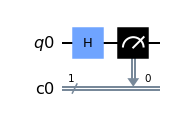

      ┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

{'1': 1}


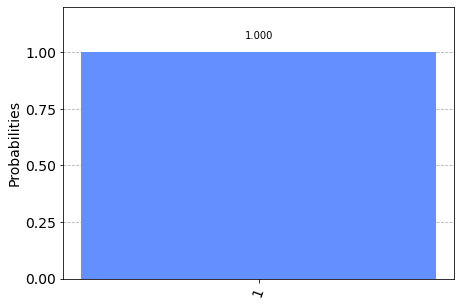

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

from IPython.core.display import display

print("Ch 4: Quantum coin toss")
print("-----------------------")

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.measure(q, c)

display(qc.draw('mpl'))
print(qc)
display(qc.draw('text'))


backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
counts = result.get_counts(qc)

print(counts)
display(plot_histogram(counts))

### Coin Tosses

Ch 4: Quantum coin tosses
-------------------------


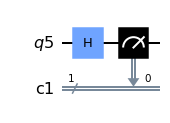

{'0': 532, '1': 468}


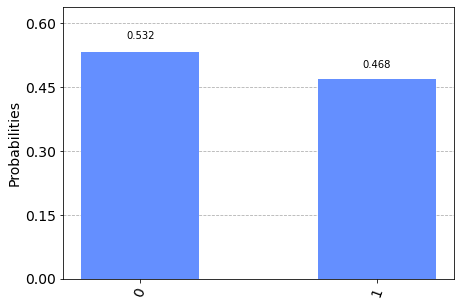

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

from IPython.core.display import display

print("Ch 4: Quantum coin tosses")
print("-------------------------")

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.measure(q, c)
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

display(plot_histogram(counts))

### Coin Toss Tails

Ch 4: Upside down quantum coin toss
-----------------------------------
     ┌─────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0,1) ├┤ H ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0 


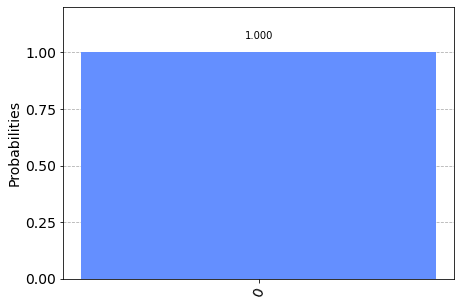

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

from IPython.core.display import display

print("Ch 4: Upside down quantum coin toss")
print("-----------------------------------")


qc = QuantumCircuit(1, 1)
initial_vector = [0.+0.j, 1.+0.j]
qc.initialize(initial_vector,0)

#qc.x(0)
qc.h(0)
qc.measure(0, 0)

print(qc)
#display(qc.draw())

backend = Aer.get_backend('qasm_simulator')

counts = execute(qc, backend, shots=1).result().get_counts(qc)
              
display(plot_histogram(counts))

### Two Coin Toss

Ch 4: Quantum double coin toss
------------------------------


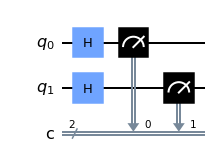

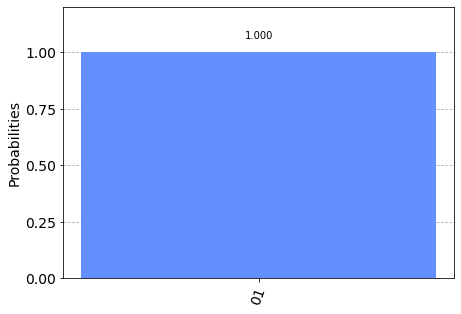

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from IPython.core.display import display

print("Ch 4: Quantum double coin toss")
print("------------------------------")

qc = QuantumCircuit(2, 2)

qc.h([0,1])
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1).result().get_counts(qc)

display(plot_histogram(counts))


### Two Coin Toss Bell

Ch 4: Cheating quantum coin toss
--------------------------------


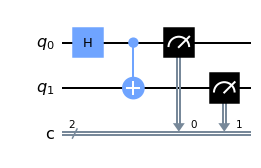

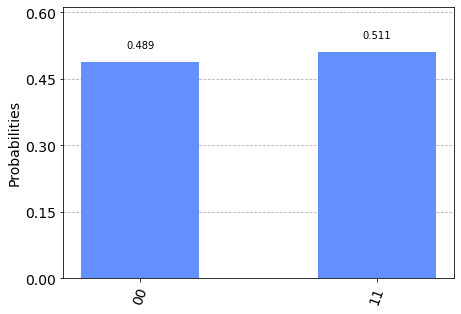

In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from IPython.core.display import display

print("Ch 4: Cheating quantum coin toss")
print("--------------------------------")

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1000).result().get_counts(qc)

display(plot_histogram(counts))

### Coin Toss Rotation

Ch 4: More Cheating quantum coin toss
-------------------------------------
Qubit in ground state |0>


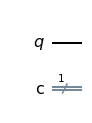

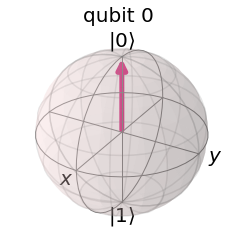

Qubit in super position


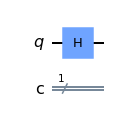

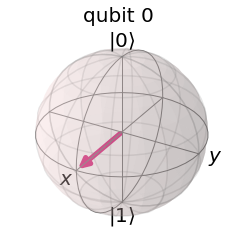

Qubit pi/8 radians closer to |1>


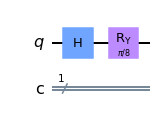

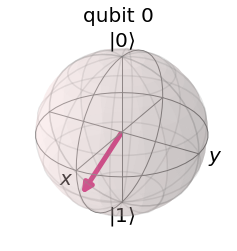

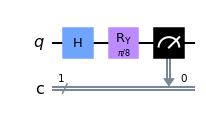

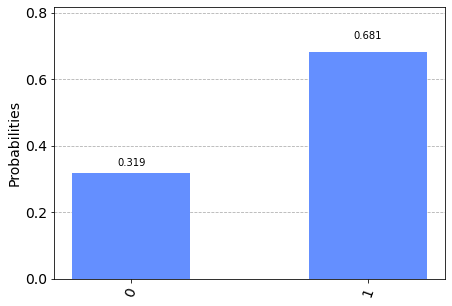

In [6]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from IPython.core.display import display
from math import pi

# Function that returns the state vector (Psi) for the circuit
def get_psi(circuit, title):
    show_bloch=True
    if show_bloch:
        from qiskit.visualization import plot_bloch_multivector
        backend = Aer.get_backend('statevector_simulator') 
        result = execute(circuit, backend).result()
        psi = result.get_statevector(circuit)
        print(title)
        display(qc.draw('mpl'))
        display(plot_bloch_multivector(psi)) 


print("Ch 4: More Cheating quantum coin toss")
print("-------------------------------------")

qc = QuantumCircuit(1, 1)

get_psi(qc, title='Qubit in ground state |0>')
qc.h(0)
get_psi(qc, title='Qubit in super position')
qc.ry(pi/8,0)
get_psi(qc, title='Qubit pi/8 radians closer to |1>') 
qc.measure(0, 0)

display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1000).result().get_counts(qc)

display(plot_histogram(counts))

### Three Coin Toss GHZ Game

Ch 4: Three-qubit coin toss
---------------------------


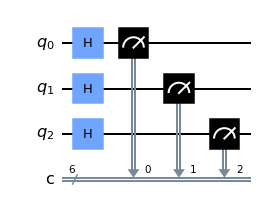

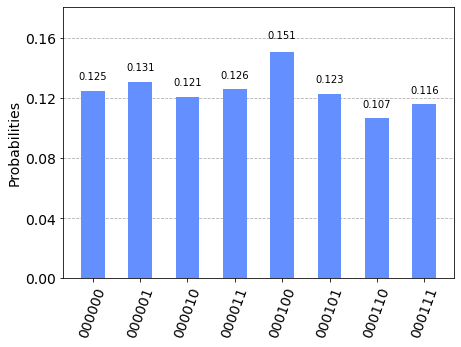

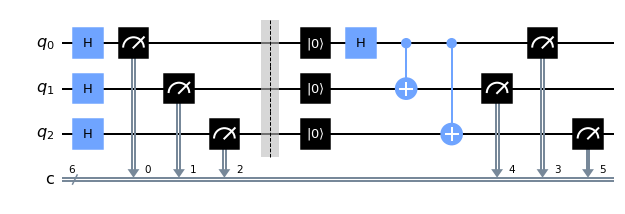

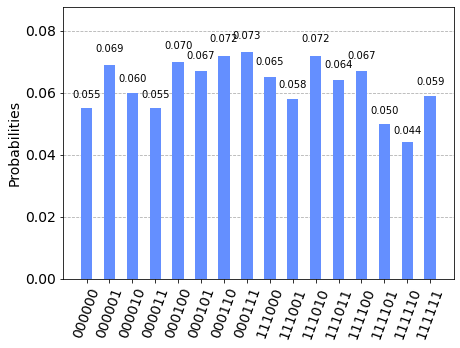

In [7]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram
from IPython.core.display import display

print("Ch 4: Three-qubit coin toss")
print("---------------------------")


qc = QuantumCircuit(3, 6)

qc.h([0,1,2])
qc.measure([0,1,2],[0,1,2])

display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')

counts = execute(qc, backend, shots=1000).result().get_counts(qc)
display(plot_histogram(counts))

qc.barrier([0,1,2])
qc.reset([0,1,2])

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[3,4,5])

display(qc.draw('mpl'))

counts = execute(qc, backend, shots=1000).result().get_counts(qc)
display(plot_histogram(counts))

### Coin  Toss IBMQ

In [9]:
IBMQ.save_account('ENTER YOUR API KEY HERE', overwrite=True)

Getting provider...
Ch 4: Quantum coin toss on IBM Q backend
----------------------------------------


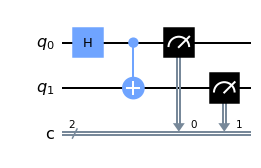

ibmq_belem
Job Status: job has successfully run
Result(backend_name='ibmq_belem', backend_version='1.0.50', qobj_id='accfb7ed-7a03-4df3-ad93-3a025e3f859a', job_id='632b367095ea0782d84850aa', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 510, '0x1': 27, '0x2': 36, '0x3': 427}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-262', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2022-09-21 16:16:03+00:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_belem', backend_version='1.0.50'), execution_id='af564c30-39c8-11ed-a209-b02628f7f59e', time_taken=2.0621166229248047, error=None, client_version={'qiskit': '0.38.0'})


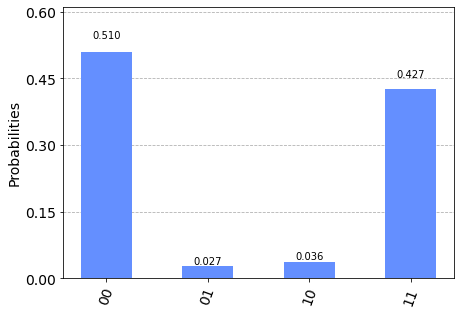

In [10]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from IPython.core.display import display

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

print("Ch 4: Quantum coin toss on IBM Q backend")
print("----------------------------------------")

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(n_qubits=5, operational=True, simulator=False))
print(backend.name())

job = execute(qc, backend, shots=1000)
job_monitor(job)

result = job.result()
print(result)
counts = result.get_counts(qc)
from qiskit.tools.visualization import plot_histogram
display(plot_histogram(counts))